In [1]:
import numpy as np  
import pandas as pd      
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split   

import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns

The code calculates the 'Inflation Factor', a measure of multi-collinearity:  please see Dangeti, Assumptions of linear regression.

VIF is calculated for each independent variable by calculating the R-squared value with respect to all the other independent variables and tries to eliminate which variable has the highest VIF value one by one:

$$VIF=\frac{1}{1-R^2}$$

# Linear Regression

In [5]:
wine_quality = pd.read_csv("../data/winequality-white.csv",sep=';')  
# Step for converting white space in columns to _ value for better handling 

In [6]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Step for converting white space in columns to _ value for better handling 

In [7]:
wine_quality.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [5]:
wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


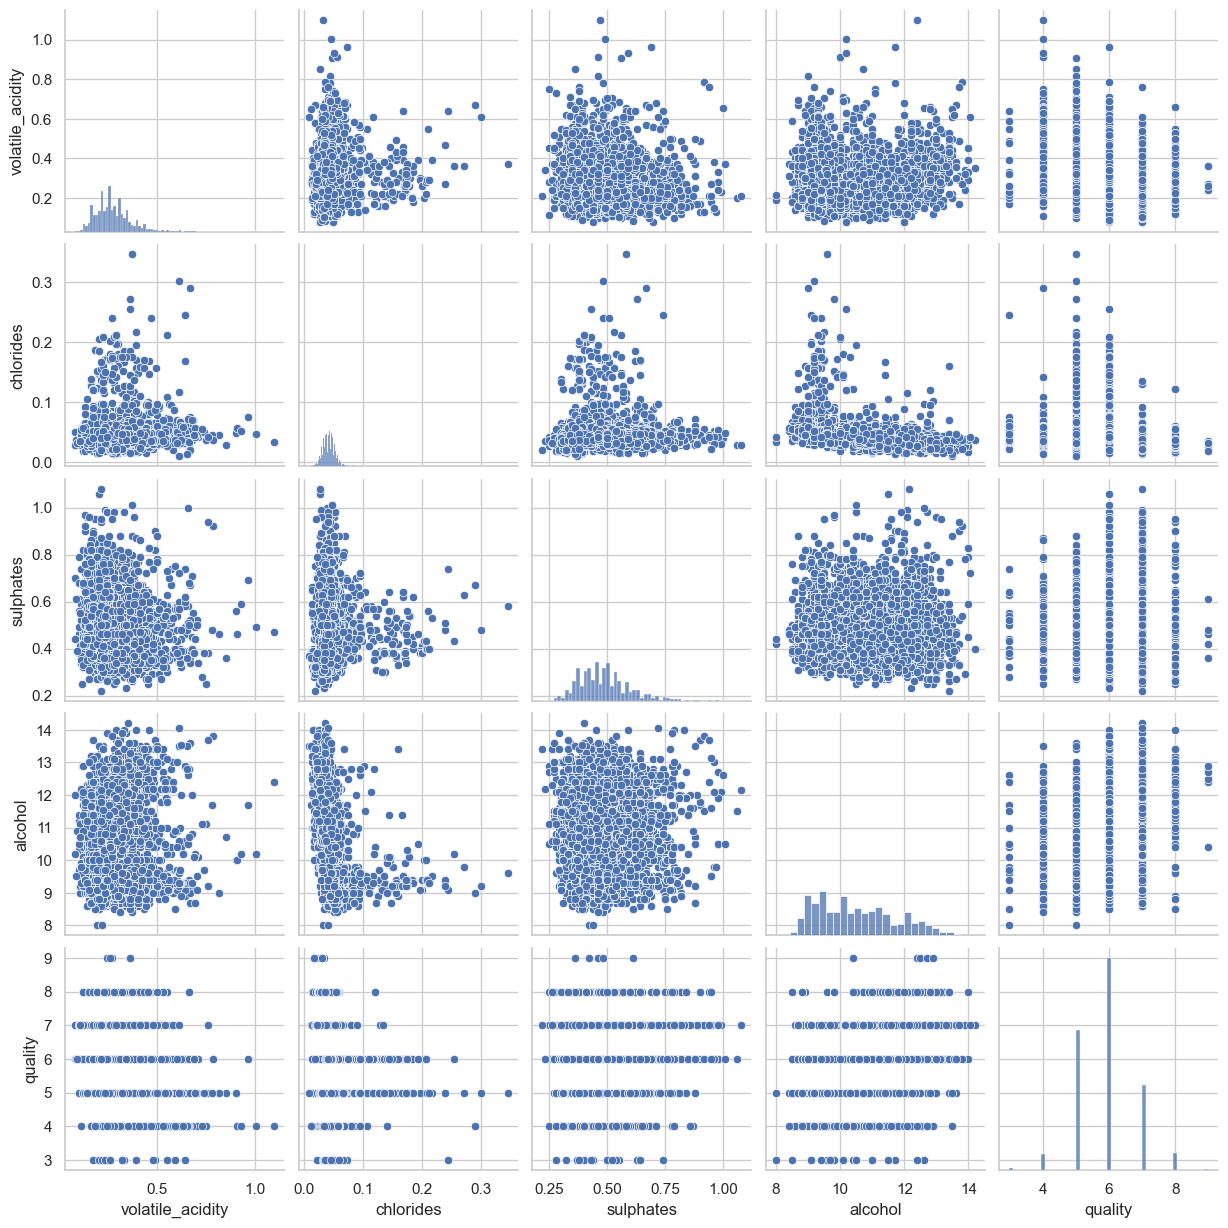

In [8]:
# Plots - pair plots
eda_colnms = [ 'volatile_acidity',  'chlorides', 'sulphates', 'alcohol','quality']
sns.set(style='whitegrid',context = 'notebook')
sns.pairplot(wine_quality[eda_colnms],height = 2.5,x_vars= eda_colnms,y_vars=eda_colnms)
plt.show()

# Multi linear regression model

In [7]:
colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

print("wine_quality type= ", type(wine_quality))
print("pdx type= ", type(pdx))
print("pdy type= ", type(pdy))

wine_quality type=  <class 'pandas.core.frame.DataFrame'>
pdx type=  <class 'pandas.core.frame.DataFrame'>
pdy type=  <class 'pandas.core.series.Series'>


In [8]:
pdx.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [9]:
pdy.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [10]:
x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)

#random.seed(434)
full_mod = sm.OLS(y_train,x_train_new)
full_res = full_mod.fit()
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     124.7
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          8.20e-241
Time:                        13:54:44   Log-Likelihood:                -3895.2
No. Observations:                3428   AIC:                             7814.
Df Residuals:                    3416   BIC:                             7888.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  131.0

In [11]:
y_pred_new = full_res.predict(x_test_new)
mse_OLS_all_variables = mean_squared_error(y_test, y_pred_new)
print("mse_OLS_all_variables:",round(mse_OLS_all_variables,4))

mse_OLS_all_variables: 0.5543


If VIF <= 4 suggests no multi-collinearity, in banking scenarios, people use VIF <= 2 also!

In [12]:
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
fixed_acidity 2.615
volatile_acidity 1.132
citric_acid 1.171
residual_sugar 12.087
chlorides 1.225
free_sulfur_dioxide 1.777
total_sulfur_dioxide 2.202
density 25.78
pH 2.137
sulphates 1.132
alcohol 6.899


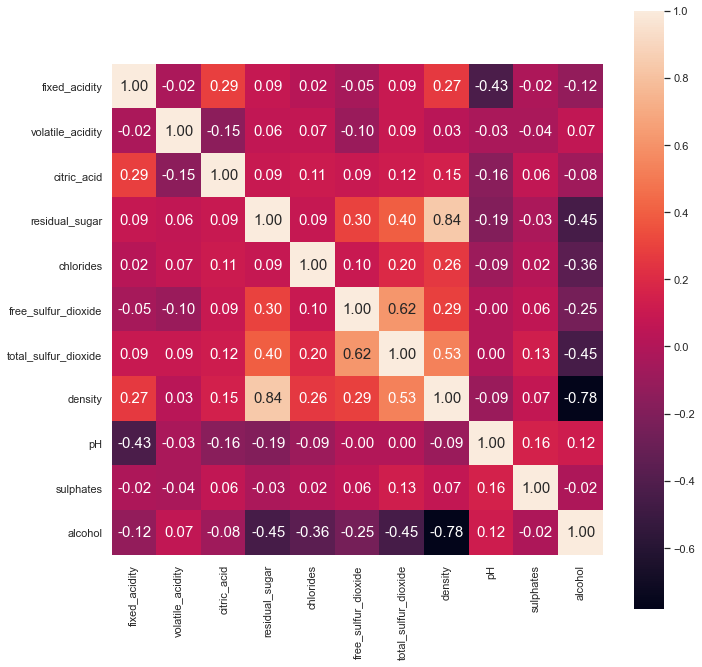

In [13]:
# Correlation coefficients
corr_mat = np.corrcoef(wine_quality[colnms].values.T)
sns.set(font_scale=1)
sns.set(rc={"figure.figsize":(11, 11)})
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True,
fmt='.2f',annot_kws={'size': 15}, yticklabels=colnms,
xticklabels=colnms)
plt.show()

#  Backward Elimination

Backward selection is explained in Dangeti, Backward and Forward selection.

In the backward method, iterations start with considering all the variables and we will remove variables one by one until all the prescribed statistics are met (such as no insignificance and multi-collinearity, and so on).

Varialbles are removed according to a selection criteria.  This criteria can be: high p-value (not significant), no impact on mse or $R^2$, etc.

In [14]:
colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


for i in np.arange(len(colnms)):
    pdx = wine_quality[colnms]
    pdy = wine_quality["quality"]

    x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
    x_train_new = sm.add_constant(x_train)
    x_test_new = sm.add_constant(x_test)

    #random.seed(434)
    full_mod = sm.OLS(y_train,x_train_new)
    full_res = full_mod.fit()
    
    y_pred_new = full_res.predict(x_test_new)
    mse_full_res = mean_squared_error(y_test, y_pred_new)
    

    if np.amax(full_res.pvalues) > 0.05:
        pop_par = full_res.pvalues.keys()[np.where(full_res.pvalues.values == np.amax(full_res.pvalues.values))[0][0]]
        print("\n","Step:",i+1,"Coefficient Removed:",pop_par,"p-value:",np.amax(full_res.pvalues),"mse:",mse_full_res)
        colnms.pop(np.where(full_res.pvalues.values == np.amax(full_res.pvalues.values))[0][0]-1)
    else:
        break


 Step: 1 Coefficient Removed: total_sulfur_dioxide p-value: 0.7080127764745155 mse: 0.5542927330136748

 Step: 2 Coefficient Removed: chlorides p-value: 0.665638147854815 mse: 0.554446232439619

 Step: 3 Coefficient Removed: citric_acid p-value: 0.4745798999791496 mse: 0.5540760907108186


In [15]:
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     171.5
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          6.02e-244
Time:                        13:54:45   Log-Likelihood:                -3895.7
No. Observations:                3428   AIC:                             7809.
Df Residuals:                    3419   BIC:                             7865.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 132.4110

If VIF <= 4 suggests no multi-collinearity, in banking scenarios, people use VIF <= 2 also!

In [16]:
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
fixed_acidity 2.495
volatile_acidity 1.062
residual_sugar 11.42
free_sulfur_dioxide 1.162
density 24.054
pH 2.062
sulphates 1.124
alcohol 6.829


In [17]:
#mean_squared_error
print ("\nTest MSE value:",round(mse_full_res,4))


Test MSE value: 0.5535


# Ridge Regression

In [18]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]


In [19]:
x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)

alphas = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10.0]

initrsq = [0]
ridge_alpha=[]
ridge_test_rsq=[]
ridge_mse = []

# print ("\nRidge Regression: Best Parameters\n")
for alph in alphas:
    ridge_reg = Ridge(alpha=alph) 
    ridge_reg.fit(x_train,y_train)    
    tr_rsqrd = ridge_reg.score(x_train,y_train)
    ts_rsqrd = ridge_reg.score(x_test,y_test)  
    ridge_y_test_pred=ridge_reg.predict(x_test)
    mse = mean_squared_error(y_test, ridge_y_test_pred)

    print("alpha",alph,"   test R2",ts_rsqrd, "   MSE =", mse)
    ridge_alpha.append(alph)
    ridge_test_rsq.append(ts_rsqrd)
    ridge_mse.append(mse)

    if ts_rsqrd > initrsq:
        print ("Lambda: ",alph,"Train R-Squared value:",round(tr_rsqrd,5),"Test R-squared value:",round(ts_rsqrd,5),"Test MSE:",mse)
        initrsq = ts_rsqrd
        best_alpha = alph

alpha 0.0001    test R2 0.26531048494839793    MSE = 0.5547142133337623
Lambda:  0.0001 Train R-Squared value: 0.28653 Test R-squared value: 0.26531 Test MSE: 0.5547142133337623
alpha 0.001    test R2 0.2616719233872242    MSE = 0.5574614443377751
alpha 0.01    test R2 0.25550952185414744    MSE = 0.5621142556936407
alpha 0.1    test R2 0.25388203309933854    MSE = 0.5633430620476689
alpha 0.5    test R2 0.2537379368063153    MSE = 0.5634518593834021
alpha 1.0    test R2 0.253781623972653    MSE = 0.5634188741677275
alpha 5.0    test R2 0.25409656538998604    MSE = 0.5631810832683299
alpha 10.0    test R2 0.25355183350922494    MSE = 0.5635923733582572


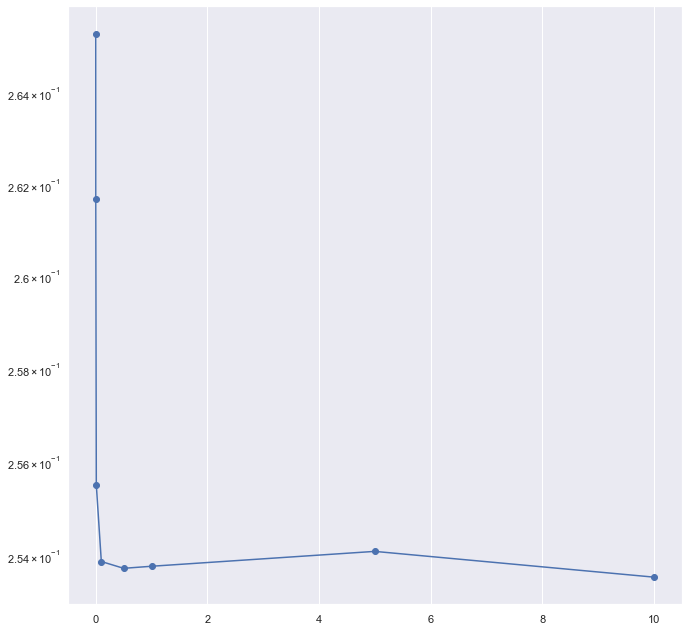

In [20]:
plt.scatter(ridge_alpha,ridge_test_rsq)
plt.plot(ridge_alpha,ridge_test_rsq)
plt.semilogy(basey=10)
plt.show()

### Search for your chosen alpha here

In [21]:
# Coeffients of Ridge regression of best alpha value

alpha = 0.0001
ridge_reg = Ridge(alpha= alpha) 
ridge_reg.fit(x_train,y_train) 

Ridge(alpha=0.0001)

In [22]:
print ("\nRidge Regression coefficient values of Alpha =",alpha,"\n")
for i in range(11):
    print (all_colnms[i],": ",ridge_reg.coef_[i])


Ridge Regression coefficient values of Alpha = 0.0001 

fixed_acidity :  0.04447884081530463
volatile_acidity :  -1.9360401489516161
citric_acid :  -0.08870675229783277
residual_sugar :  0.07089680141939417
chlorides :  0.23816003252301396
free_sulfur_dioxide :  0.0046978992525379916
total_sulfur_dioxide :  -0.00020806906962056213
density :  -121.26085912125005
pH :  0.6114724717715407
sulphates :  0.676908414093695
alcohol :  0.2373394538960636


In [23]:
ridge_y_test_pred=ridge_reg.predict(x_test)

# R-square calculation
rsqd = r2_score(y_test, ridge_y_test_pred)
print ("\nTest R-squared value:",round(rsqd,4))

#mean_squared_error
mse = mean_squared_error(y_test, ridge_y_test_pred)
print ("\nTest MSE value:",round(mse,4))


Test R-squared value: 0.2653

Test MSE value: 0.5547


# Lasso Regression

In [24]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)

alphas = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10.0]
initrsq = 0
print ("\nLasso Regression: Best Parameters\n")

initrsq = [0]
lasso_alpha=[]
lasso_test_rsq=[]
lasso_mse = []

for alph in alphas:
    lasso_reg = Lasso(alpha=alph) 
    lasso_reg.fit(x_train,y_train)    
    tr_rsqrd = lasso_reg.score(x_train,y_train)
    ts_rsqrd = lasso_reg.score(x_test,y_test)    
    lasso_y_test_pred=lasso_reg.predict(x_test)
    mse = mean_squared_error(y_test, lasso_y_test_pred)

    print("alpha",alph,"   test R2",ts_rsqrd, "   MSE =", mse)
    lasso_alpha.append(alph)
    lasso_test_rsq.append(ts_rsqrd)
    lasso_mse.append(mse)

    
    if ts_rsqrd > initrsq:
        print ("Lambda: ",alph,"Train R-Squared value:",round(tr_rsqrd,5),"Test R-squared value:",round(ts_rsqrd,5),"Test MSE:",mse)
        initrsq = ts_rsqrd



Lasso Regression: Best Parameters

alpha 0.0001    test R2 0.25335093546260745    MSE = 0.5637440578448418
Lambda:  0.0001 Train R-Squared value: 0.27882 Test R-squared value: 0.25335 Test MSE: 0.5637440578448418
alpha 0.001    test R2 0.2545765977506387    MSE = 0.5628186433969845
Lambda:  0.001 Train R-Squared value: 0.2784 Test R-squared value: 0.25458 Test MSE: 0.5628186433969845
alpha 0.01    test R2 0.24492793942885815    MSE = 0.5701036907551421
alpha 0.1    test R2 0.20013673470105287    MSE = 0.6039224909228712
alpha 0.5    test R2 0.05352873276333514    MSE = 0.7146162476693572
alpha 1.0    test R2 0.04739580078497285    MSE = 0.719246808563598
alpha 5.0    test R2 0.010413089525044716    MSE = 0.7471699450222146
alpha 10.0    test R2 -0.0011619661806652193    MSE = 0.7559094843630426


In [25]:
# Coeffients of Lasso regression of best alpha value
alpha = 0.01
lasso_reg = Lasso(alpha=alpha) 
lasso_reg.fit(x_train,y_train) 

Lasso(alpha=0.01)

In [26]:
print ("\nLasso Regression coefficient values of Alpha =",alpha,"\n")
for i in range(11):
    print (all_colnms[i],": ",lasso_reg.coef_[i])



Lasso Regression coefficient values of Alpha = 0.01 

fixed_acidity :  -0.052268922933695554
volatile_acidity :  -1.0046650143233669
citric_acid :  -0.0
residual_sugar :  0.019476900896846092
chlorides :  -0.0
free_sulfur_dioxide :  0.007100534597078792
total_sulfur_dioxide :  -0.0011724749815946254
density :  -0.0
pH :  0.0
sulphates :  0.0
alcohol :  0.3526233590572669


In [27]:
lasso_y_test_pred=lasso_reg.predict(x_test)

# R-square calculation
rsqd = r2_score(y_test, lasso_y_test_pred)
print ("\nTest R-squared value:",round(rsqd,4))

#mean_squared_error
mse = mean_squared_error(y_test, lasso_y_test_pred)
print ("\nTest MSE value:",round(mse,4))


Test R-squared value: 0.2449

Test MSE value: 0.5701


#  Comparison

In [28]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

In [29]:
type(x_train)

pandas.core.frame.DataFrame

In [30]:
alphas = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10,20]
initrsq = 0

lasso_mse_train = []
lasso_mse_test = []

ridge_mse_train = []
ridge_mse_test = []

for alph in alphas:
        lasso_reg = Lasso(alpha=alph) 
        lasso_reg.fit(x_train,y_train) 

        lasso_y_train_pred = lasso_reg.predict(x_train)
        lasso_y_test_pred = lasso_reg.predict(x_test)

        ridge_reg = Ridge(alpha=alph)
        ridge_reg.fit(x_train,y_train) 

        ridge_y_train_pred = ridge_reg.predict(x_train)
        ridge_y_test_pred = ridge_reg.predict(x_test)

        #Calculate quality of predictors

        tr_lasso_mse = mean_squared_error(y_train, lasso_y_train_pred)
        ts_lasso_mse = mean_squared_error(y_test, lasso_y_test_pred)

        tr_ridge_mse = mean_squared_error(y_train, ridge_y_train_pred)
        ts_ridge_mse = mean_squared_error(y_test, ridge_y_test_pred)

        #append quality metrics

        lasso_mse_train.append(tr_lasso_mse)
        lasso_mse_test.append(ts_lasso_mse)

        ridge_mse_train.append(tr_ridge_mse)
        ridge_mse_test.append(ts_ridge_mse)

    



In [31]:
zipped = list(zip(alphas, lasso_mse_train,lasso_mse_test,ridge_mse_train,ridge_mse_test))
df = pd.DataFrame(zipped, columns=['lambda', 'lasso_mse_train','lasso_mse_test','ridge_mse_train','ridge_mse_test'])
print(df)

    lambda  lasso_mse_train  lasso_mse_test  ridge_mse_train  ridge_mse_test
0   0.0001         0.574373        0.563744         0.568237        0.554714
1   0.0010         0.574708        0.562819         0.569444        0.557461
2   0.0100         0.589762        0.570104         0.573079        0.562114
3   0.1000         0.633311        0.603922         0.574200        0.563343
4   0.5000         0.758293        0.714616         0.574329        0.563452
5   1.0000         0.765291        0.719247         0.574376        0.563419
6   5.0000         0.789668        0.747170         0.575108        0.563181
7  10.0000         0.796438        0.755909         0.576681        0.563592
8  20.0000         0.796438        0.755909         0.580448        0.565529


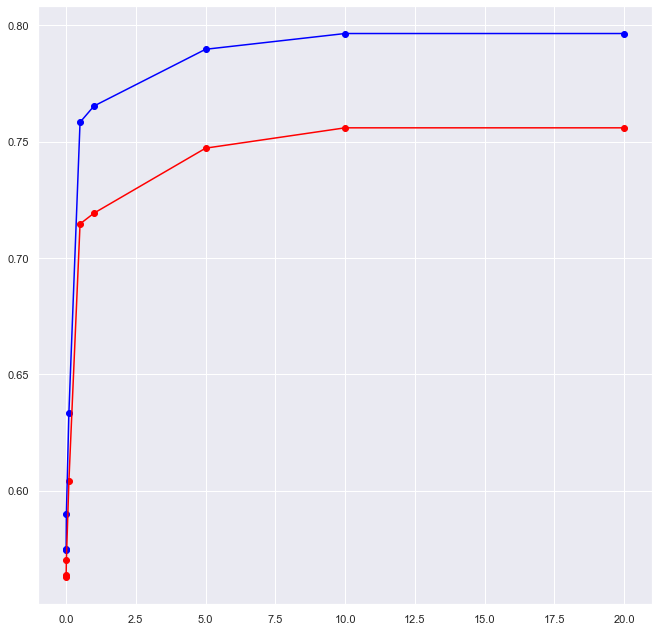

In [32]:
plt.plot(alphas,lasso_mse_train,color='blue')
plt.scatter(alphas,lasso_mse_train,color='blue')
plt.plot(alphas,lasso_mse_test,color='red')
plt.scatter(alphas,lasso_mse_test,color='red')
plt.show()

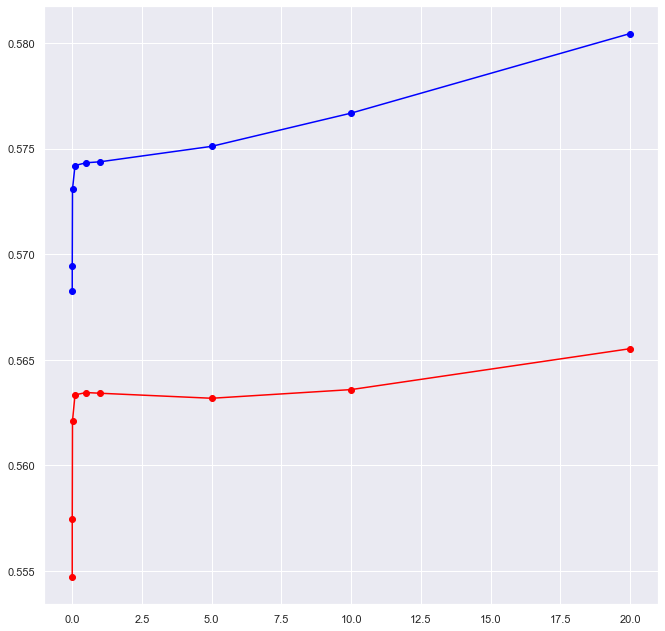

In [33]:
plt.plot(alphas,ridge_mse_train,color='blue')
plt.scatter(alphas,ridge_mse_train,color='blue')
plt.plot(alphas,ridge_mse_test,color='red')
plt.scatter(alphas,ridge_mse_test,color='red')
plt.show()

## Which model would you choose?

The code allows you to calculate the metrics for different $\alpha$ values.  Please use the tables provided above as a guideline on what range to explore, you can 'zoom in' with the code provided below.

In [34]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Coeffients of Lasso regression
lasso_reg = Lasso(alpha=1e-2) 
lasso_reg.fit(x_train,y_train) 

lasso_y_test_pred = lasso_reg.predict(x_test)

print ("\nLasso Regression coefficient values of Alpha = 0.001\n")
for i in range(11):
    print (all_colnms[i],": ",lasso_reg.coef_[i])
    
print("\n \n mse =", round(mean_squared_error(y_test, lasso_y_test_pred),4))


Lasso Regression coefficient values of Alpha = 0.001

fixed_acidity :  -0.052268922933695554
volatile_acidity :  -1.0046650143233669
citric_acid :  -0.0
residual_sugar :  0.019476900896846092
chlorides :  -0.0
free_sulfur_dioxide :  0.007100534597078792
total_sulfur_dioxide :  -0.0011724749815946254
density :  -0.0
pH :  0.0
sulphates :  0.0
alcohol :  0.3526233590572669

 
 mse = 0.5701


In [35]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Coeffients of Lasso regression
ridge_reg = Ridge(alpha=1e-2) 
ridge_reg.fit(x_train,y_train) 

ridge_y_test_pred = ridge_reg.predict(x_test)

print ("\nRidge Regression coefficient values of Alpha = 0.001\n")
for i in range(11):
    print (all_colnms[i],": ",ridge_reg.coef_[0][i])
    
print("\n \n mse =", round(mean_squared_error(y_test, ridge_y_test_pred),4))


Ridge Regression coefficient values of Alpha = 0.001

fixed_acidity :  -0.03974683535271882
volatile_acidity :  -2.0211978947357006
citric_acid :  -0.12489561966875877
residual_sugar :  0.03035805558637921
chlorides :  -0.288995573404101
free_sulfur_dioxide :  0.005480183244153552
total_sulfur_dioxide :  -0.0006114107012425643
density :  -14.310882275173988
pH :  0.2287127630462235
sulphates :  0.5210225796196953
alcohol :  0.3566072447778277

 
 mse = 0.5621


In [36]:
print("OLS backward elimination parameters\n\n",full_res.params,"\n\n MSE = ",round(mse_full_res,4))

OLS backward elimination parameters

 const                  132.411003
fixed_acidity            0.048511
volatile_acidity        -1.921205
residual_sugar           0.074736
free_sulfur_dioxide      0.004363
density               -132.511170
pH                       0.646739
sulphates                0.682848
alcohol                  0.224006
dtype: float64 

 MSE =  0.5535


In [37]:


print("mse_OLS_all_variables:",round(mse_OLS_all_variables,4))

mse_OLS_all_variables: 0.5543


If you apply the code provided in class to check if the parametric assumptions are met, and check the results, you can validate that when parametric conditions are met, it is a very efficient method.  Keep in mind that in real life applications, a full OLS or a backward elimination maybe too expensive computationally.